In [1]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation

from estimate_rot import accel_2_euler

In [2]:
data_num = 3
imu = io.loadmat('imu/imuRaw'+str(data_num)+'.mat')
accel = imu['vals'][0:3,:] # order: roll, pitch, yaw
gyro = imu['vals'][3:6,:]
T = np.shape(imu['ts'])[1]
ts_imu = imu['ts'].reshape(-1,)
angle_names = ['roll', 'pitch', 'yaw']


accel_alpha = np.array([33.6, 33.6, 33.6])
accel_beta = np.array([511, 501, 500])
accel_imu = (accel - np.expand_dims(accel_beta, axis=1)) * 3300 / (1023* np.expand_dims(accel_alpha, axis=1)) 
accel_adjusted = np.vstack([accel_imu[0,:]*(-1), accel_imu[1,:]*(-1), accel_imu[2,:]])

accel_imu[:, :10]

array([[-0.09600614, -0.09600614, -0.09600614, -0.09600614, -0.09600614,
        -0.09600614, -0.09600614, -0.09600614,  0.        , -0.09600614],
       [-0.09600614,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.09600614],
       [10.17665131, 10.17665131, 10.17665131, 10.17665131, 10.17665131,
        10.17665131, 10.17665131, 10.17665131, 10.17665131, 10.17665131]])

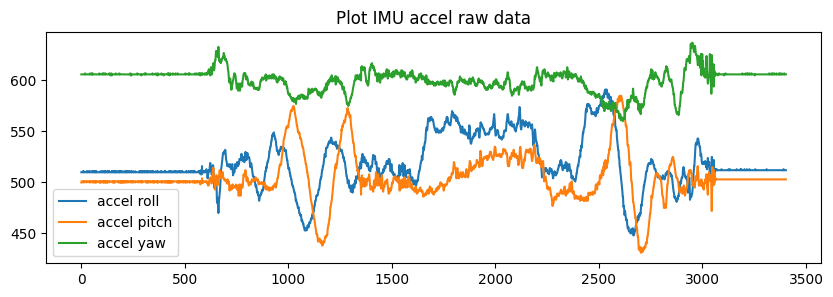

In [3]:
plt.figure(figsize = (10,3))
for i in range(3):
    plt.plot( accel[i,:], label = 'accel '+ angle_names[i])
plt.title('Plot IMU accel raw data')
plt.legend()

this adjustment is wrong! a_z around 9.8, ay, ax around 0

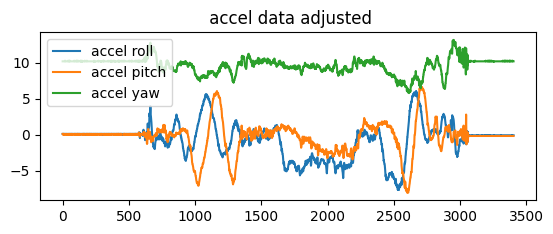

In [4]:
plt.subplot(2,1,1)
for i in range(3):
    plt.plot(accel_adjusted[i,:], label = 'accel '+ angle_names[i])
plt.title(' accel data adjusted')
plt.legend()

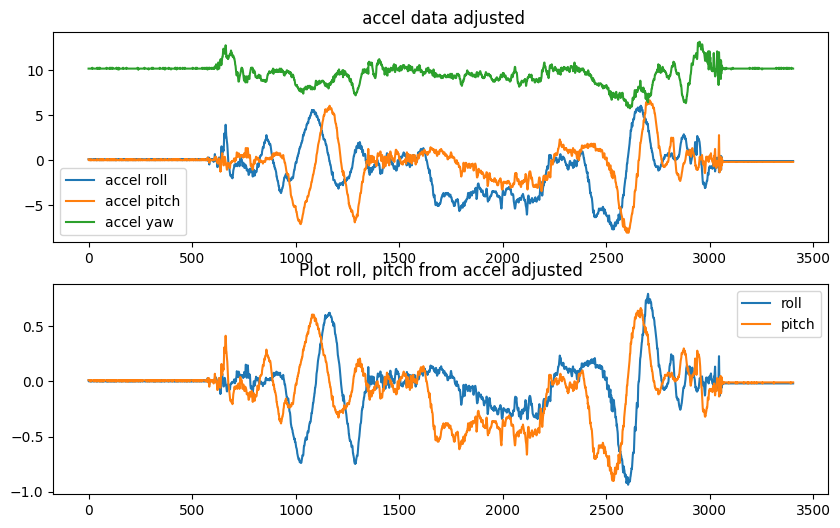

In [5]:
euler_accel_adjusted = accel_2_euler(accel_adjusted) 

plt.figure(figsize = (10,6))
plt.subplot(2,1,1)
for i in range(3):
    plt.plot(accel_adjusted[i,:], label = 'accel '+ angle_names[i])
plt.title(' accel data adjusted')
plt.legend()

plt.subplot(2,1,2)
for i in range(2):
    plt.plot(euler_accel_adjusted[i,:], label = angle_names[i])
plt.title('Plot roll, pitch from accel adjusted')
plt.legend()

In [6]:
330/9.81 * np.ones(3)

array([33.63914373, 33.63914373, 33.63914373])

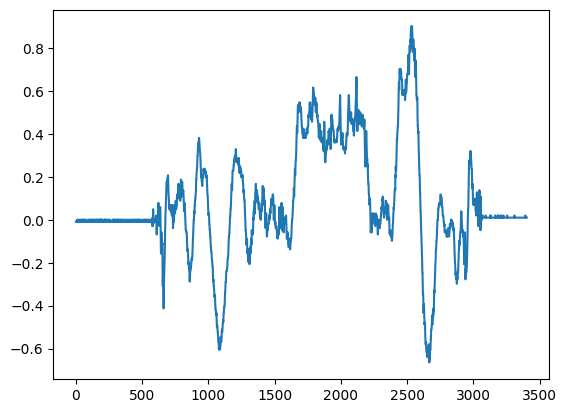

In [7]:
plt.plot(np.arcsin(accel_imu[0,:]/9.81))


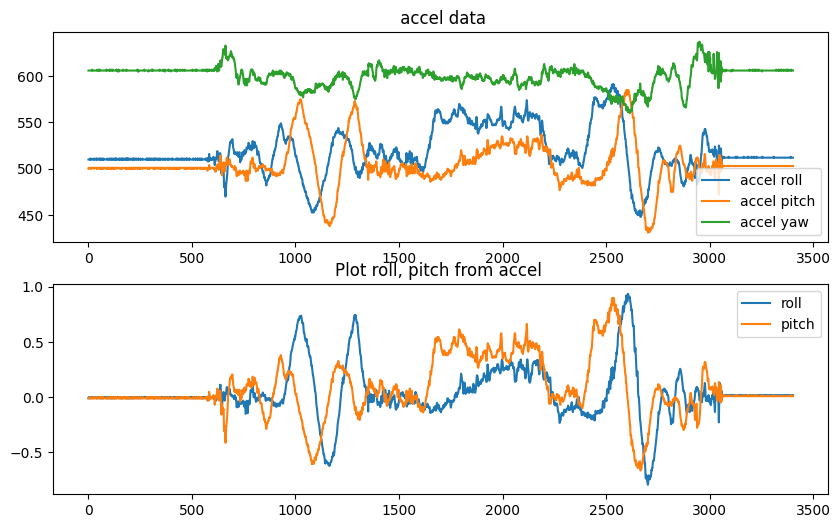

In [8]:
euler_accel_imu = accel_2_euler(accel_imu) 

plt.figure(figsize = (10,6))
plt.subplot(2,1,1)
for i in range(3):
    plt.plot( accel[i,:], label = 'accel '+ angle_names[i])
plt.title(' accel data')
plt.legend()

plt.subplot(2,1,2)
for i in range(2):
    plt.plot( euler_accel_imu[i,:], label = angle_names[i])
plt.title('Plot roll, pitch from accel ')
plt.legend()

## Vicon data processing

Text(0.5, 1.0, 'Vicon Euler angles data')

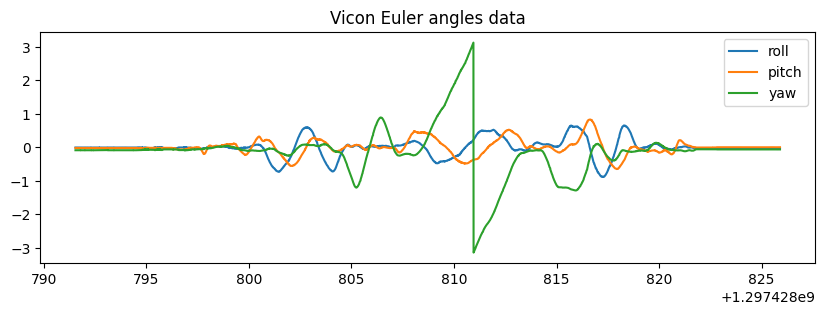

In [9]:
vicon = io.loadmat('vicon/viconRot'+str(data_num)+'.mat')
T_vicon = np.shape(vicon['ts'])[1]
ts_vicon = vicon['ts'].reshape(-1,)

euler_vicon = []
for t in range(T_vicon):
    vicon_r = Rotation.from_matrix(vicon['rots'][:,:,t])
    euler_vicon.append(vicon_r.as_euler("zyx")) #yaw, pitch, roll
euler_vicon = np.array(euler_vicon).T
euler_vicon[[2,0], :] = euler_vicon[[0,2], :]

plt.figure(figsize = (10,3))
for i in range(3):
    plt.plot(ts_vicon, euler_vicon[i,:], label = angle_names[i])
plt.legend()
plt.title('Vicon Euler angles data')

For orientation of IMU and vicon (different): x and z flipped
at first time stpes, gyro should be around 0 (no velovity)

## Test rotating Vicon rotation angles (Comeback to accel later)

In [10]:
# def plot_euler_angles(euler_accel, euler_vicon, new_euler_vicon):
#     angle_names = ['roll', 'pitch', 'yaw']
#     plt.figure(figsize = (12,8))
#     plt.subplot(3,1,1)
#     for i in range(2):
#         plt.plot(ts_imu, euler_accel[i,:], label = 'accel '+ angle_names[i])
#     plt.title('Euler angles from IMU accel data')
#     plt.xticks([])
#     plt.legend()

#     plt.subplot(3,1,2)
#     for i in range(3):
#         plt.plot(ts_vicon, euler_vicon[i,:], label =  angle_names[i])
#     plt.title('Original Vicon Euler angles data')
#     plt.xticks([])
#     plt.legend()

#     plt.subplot(3,1,3)
#     for i in range(3):
#         plt.plot(ts_vicon, new_euler_vicon[i,:], label = angle_names[i])
#     plt.legend()
#     plt.title('Rotated Vicon Euler angles data')
#     plt.show()

In [11]:
# vicon_new_rots = []
# for i in range(np.shape(vicon['ts'])[1]):
#     vicon_new_rots.append(R_matrix_rotation(0, 0, np.pi) @ vicon['rots'][:,:,i] )
# vicon_new_rots = np.array(vicon_new_rots)

# new_euler_vicon = np.vstack([rotation_angles(vicon_new_rots[t,:,:]) for t in range(T_vicon)]).transpose()

# plot_euler_angles(euler_accel_imu, euler_vicon, new_euler_vicon)


## Now let's check gyro data 

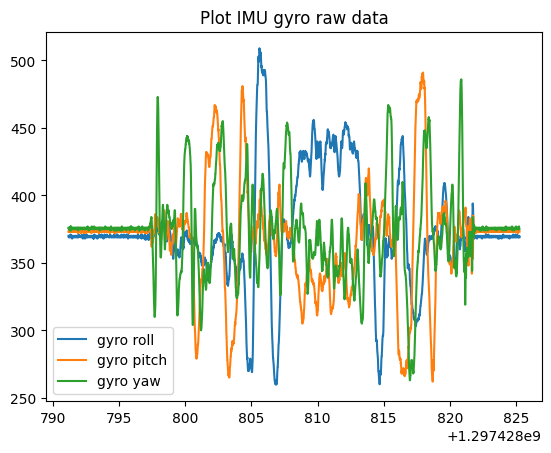

In [12]:
for i in range(3):
    plt.plot(ts_imu,gyro[i,:], label = 'gyro '+ angle_names[i])
plt.title('Plot IMU gyro raw data')
plt.legend()

In [13]:
gyro[:,:10]

array([[370, 369, 369, 370, 370, 369, 370, 370, 369, 369],
       [373, 373, 373, 374, 373, 373, 374, 374, 373, 374],
       [376, 375, 375, 376, 376, 375, 376, 375, 376, 376]], dtype=uint16)

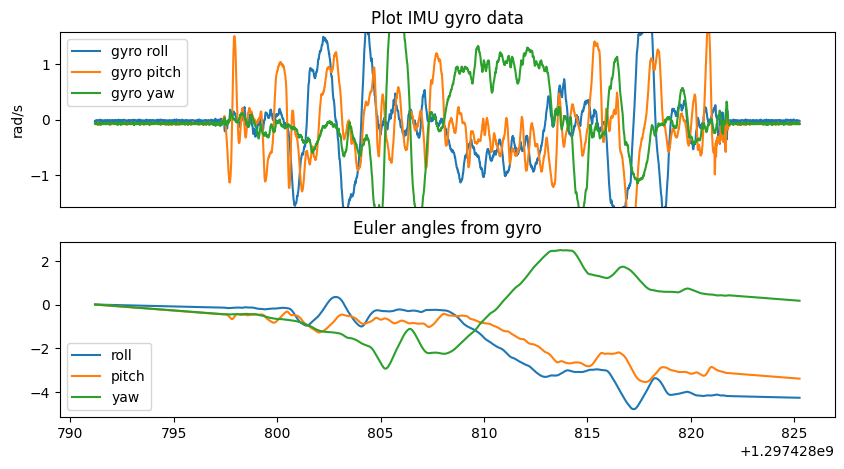

In [14]:
gyro_beta = np.array([374, 375, 380])
gyro_alpha = np.array([200, 200, 200])


gyro_imu = (gyro - np.expand_dims(gyro_beta, axis=1)) * 3300 / (1023 * np.expand_dims(gyro_alpha, axis=1))
gyro_imu = np.roll(gyro_imu, -1, axis=0)


dt = (max(ts_imu) - min(ts_imu))/T

gyro_euler = []
for i in range(3):
    angle = 0
    for t in range(T):
        angle += gyro_imu[i,t] * dt
        gyro_euler.append(angle)
gyro_euler = np.array(gyro_euler).reshape(3, T)

plt.figure(figsize = (10,5))
plt.subplot(2,1,1)
for i in range(3):
    plt.plot(ts_imu,gyro_imu[i,:], label = 'gyro '+ angle_names[i])
plt.title('Plot IMU gyro data')
plt.ylabel('rad/s')
plt.xticks([])
plt.ylim(-np.pi/2, np.pi/2)
plt.legend()

plt.subplot(2,1,2)
for i in range(3):
    plt.plot(ts_imu, gyro_euler[i,:], label =  angle_names[i])
plt.title('Euler angles from gyro')
plt.legend()


Text(0.5, 1.0, 'Vicon Euler angles data')

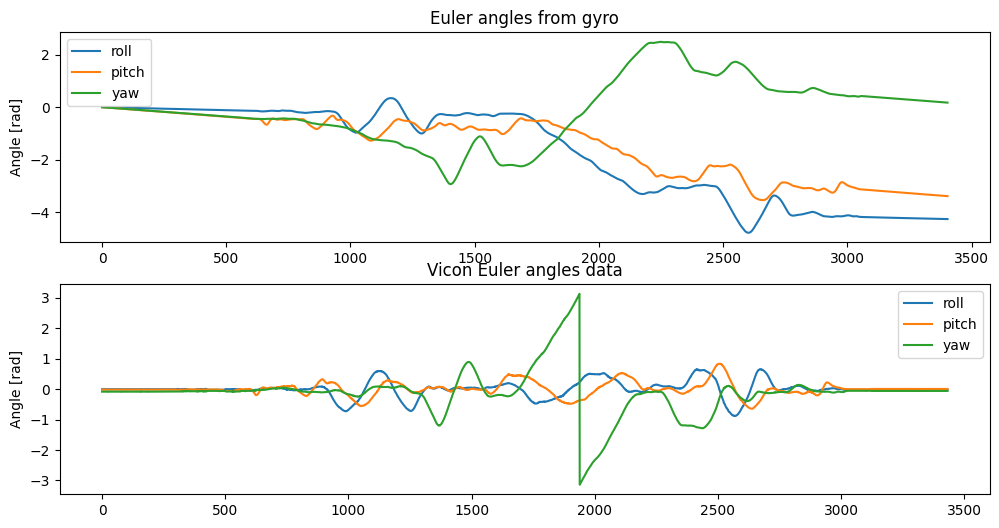

In [15]:
plt.figure(figsize = (12,6))
plt.subplot(2,1,1)
for i in range(3):
    plt.plot( gyro_euler[i,:], label =  angle_names[i])
plt.title('Euler angles from gyro')
plt.ylabel('Angle [rad]')
# plt.ylim(-np.pi/2, np.pi/2)
plt.legend()

plt.subplot(2,1,2)
for i in range(3):
    plt.plot( euler_vicon[i,:], label = angle_names[i])
plt.legend()
plt.ylabel('Angle [rad]')
plt.title('Vicon Euler angles data')

Vicon angles and gyro angles seem to overlap. This is assurring, as their coordinate systems likely to have same orientation

## Gyro calibration: 

convert vicon to rotation rate (differentiation) and use it to calibrate gyro rotation rate (rad/sec)
get the ratio to find sensitivity


Text(0.5, 1.0, 'Rotation rates from Vicon Euler angles data')

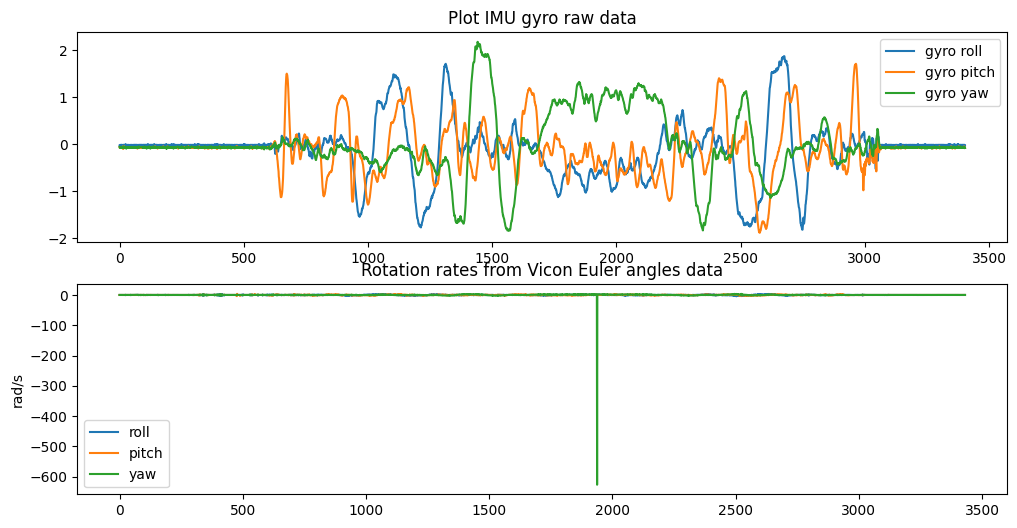

In [16]:
w_vicon = []
for i in range(3):
    for t in range(T_vicon-1):
        w_vicon.append((euler_vicon[i, t+1] - euler_vicon[i, t]) / dt)
w_vicon = np.array(w_vicon).reshape(3, T_vicon-1)

plt.figure(figsize = (12,6))
plt.subplot(2,1,1)
for i in range(3):
    plt.plot(gyro_imu[i,:], label = 'gyro '+ angle_names[i])
plt.title('Plot IMU gyro raw data')
plt.legend()

plt.subplot(2,1,2)
for i in range(3):
    plt.plot( w_vicon[i,:], label = angle_names[i])
plt.legend()
plt.ylabel('rad/s')
plt.title('Rotation rates from Vicon Euler angles data')

Text(0.5, 1.0, 'Rotation rates from Vicon Euler angles data')

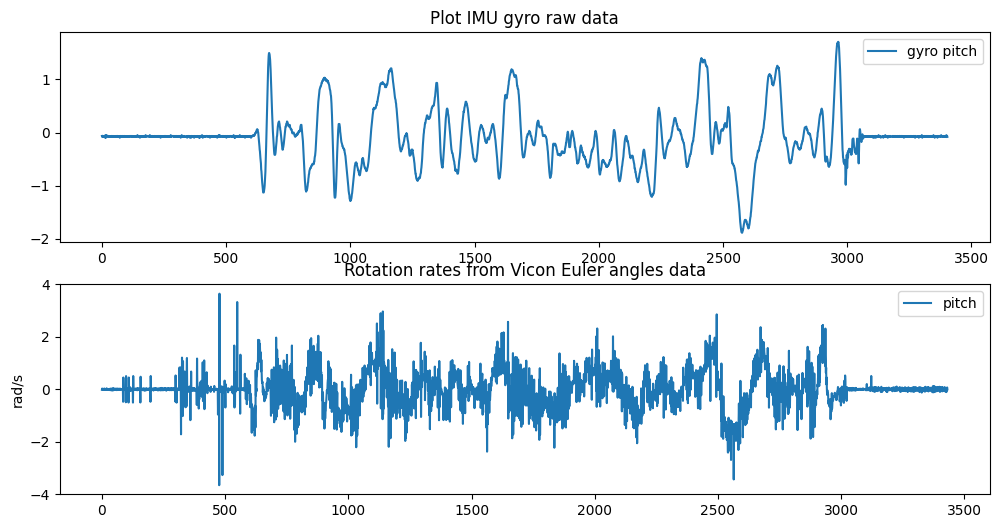

In [17]:
w_vicon = []
for t in range(T_vicon-1):
    w_vicon.append((euler_vicon[1, t+1] - euler_vicon[1, t]) / dt)
w_vicon = np.array(w_vicon)

i=1
plt.figure(figsize = (12,6))
plt.subplot(2,1,1)
plt.plot(gyro_imu[i,:], label = 'gyro '+ angle_names[i])
plt.title('Plot IMU gyro raw data')
plt.legend()

plt.subplot(2,1,2)
plt.plot( w_vicon, label = angle_names[i])
plt.legend()
plt.ylim(-4,4)
plt.ylabel('rad/s')
plt.title('Rotation rates from Vicon Euler angles data')

Text(0.5, 1.0, 'Rotation rates from Vicon Euler angles data')

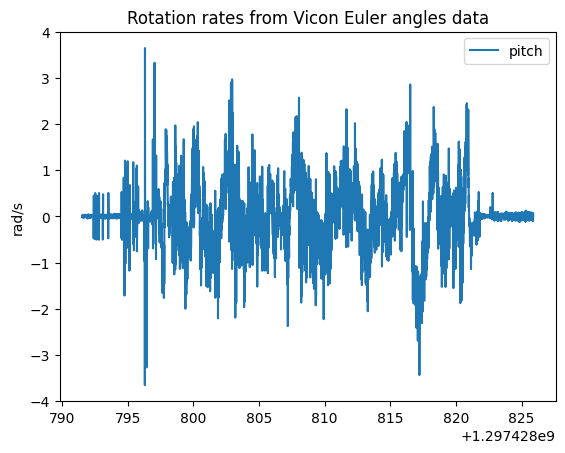

In [19]:
plt.plot(ts_vicon[:-1], w_vicon, label = angle_names[i])
plt.legend()
plt.ylim(-4,4)
plt.ylabel('rad/s')
plt.title('Rotation rates from Vicon Euler angles data')